In [1]:
install.packages("themis")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
library(themis)
library(dplyr)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [3]:
#the column name: ip means integrated profile, and curve is DM-SNR curve. This is a dataset with no missing values(NA), which is mentioned in the dataset information
# this cell is used for summarizing data in different ways
url <- "https://raw.githubusercontent.com/BorisZhang12/Project-DSCI-100/main/HTRU_2.csv"
htru_data <- read_csv(url,
                      col_names= c("mean_ip","deviation_ip","excess_kurtosis_ip"
                                 ,"skewness_ip","mean_curve","deviation_curve","excess_kurtosis_curve",
                                 "skewness_curve","Class"))|>
            mutate(Class = as_factor(Class))
htru_data

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): mean_ip, deviation_ip, excess_kurtosis_ip, skewness_ip, mean_curve,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_ip,deviation_ip,excess_kurtosis_ip,skewness_ip,mean_curve,deviation_curve,excess_kurtosis_curve,skewness_curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.234571412,-0.69964840,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0


In [4]:
#separate data into testing and training. 80% are training, the rest are testing
htru_split <- initial_split(htru_data,prop=0.8,strat=Class)
htru_train <- training(htru_split)
htru_test <- testing(htru_split)

htru_recipe_0 <- recipe(Class~., data = htru_train)|>
    step_upsample(Class, over_ratio = 1, skip=FALSE)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())|>
    prep()
preprocessed_htru_training_data <- bake(htru_recipe_0, htru_train)
preprocessed_htru_training_data

#check the result of upsampling
result <- preprocessed_htru_training_data|>
group_by(Class)|>
summarize(n=n())
result
names <- colnames(preprocessed_htru_training_data |> select(-Class))
names

mean_ip,deviation_ip,excess_kurtosis_ip,skewness_ip,mean_curve,deviation_curve,excess_kurtosis_curve,skewness_curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.41140944,1.8989128,-0.6068030,-0.6773614,-0.6596635,-1.01266574,0.9879626,0.63660601,0
0.42443994,-0.4342460,-0.6775480,-0.5542337,-0.6253351,-0.73209018,0.3975192,-0.02964359,0
0.05778169,-0.2753759,-0.5392675,-0.5485479,-0.6715105,-1.15088175,1.7555851,1.93518552,0
0.18207262,0.4441119,-0.5736268,-0.6041091,-0.6606375,-1.02550633,0.9973704,0.67810729,0
0.84702911,0.6909041,-0.8229685,-0.6456866,-0.6757841,-1.24009781,2.7816888,4.29209640,0
1.12668371,-0.3742589,-0.9175260,-0.6062459,-0.6705166,-1.03227700,1.6038274,1.37154545,0
0.53309427,1.1520271,-0.6130958,-0.6234773,-0.6440994,-1.02787911,0.6604924,0.43512756,0
0.53329474,-0.4157583,-0.6065220,-0.5454517,-0.6025554,-0.60021871,0.3271103,-0.08553127,0
1.42678618,0.2757538,-0.9982438,-0.6145465,-0.5717255,-0.43599913,0.0525739,-0.29253162,0


Class,n
<fct>,<int>
0,13013
1,13013


[1] "mean_ip"               "deviation_ip"          "excess_kurtosis_ip"   
[4] "skewness_ip"           "mean_curve"            "deviation_curve"      
[7] "excess_kurtosis_curve" "skewness_curve"

In [5]:
nrow(preprocessed_htru_training_data)
set.seed(23)
preprocessed_htru_training_data<- sample_n(preprocessed_htru_training_data, size=1500, replace = FALSE,prob=NULL)
preprocessed_htru_training_data
result <- preprocessed_htru_training_data|>
group_by(Class)|>
summarize(n=n())
result

[1] 26026

mean_ip,deviation_ip,excess_kurtosis_ip,skewness_ip,mean_curve,deviation_curve,excess_kurtosis_curve,skewness_curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.143782997,-0.8940246,-0.47486380,-0.43441805,0.625873735,1.9905089,-1.00810582,-0.69555925,0
0.328214704,-0.6988001,-0.48228784,-0.48464107,-0.002573143,1.0876691,-0.79144292,-0.65963774,1
-0.187993606,0.5175056,-0.09911144,-0.36900087,-0.015891064,0.9722929,-0.75080557,-0.64706859,1
-1.255091407,-0.9896128,1.31157685,1.06676355,0.311014216,0.9942594,-0.88335845,-0.66759362,1
-0.458627089,-1.1104537,0.22787713,0.06933888,-0.383207292,0.4642237,-0.45402763,-0.56590645,1
-2.069798426,-1.4742555,2.72511590,3.41887980,2.844381057,0.3232588,-1.16105680,-0.68368253,1
-0.313687824,-0.2808309,-0.05046214,-0.34568910,-0.442322961,0.0898553,-0.35069778,-0.51321341,1
-1.718977244,-1.2558169,1.49617995,1.35804089,1.362156022,0.8673846,-1.05509126,-0.68551135,1
0.712113312,0.4063211,-0.63116887,-0.61993241,-0.298628551,0.5542513,-0.57233704,-0.60208427,1


Class,n
<fct>,<int>
0,765
1,735


In [6]:
# create an empty tibble to store the results
accuracies <- tibble(size = integer(),
                     model_string = character(),
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
htru_vfold <- vfold_cv(preprocessed_htru_training_data, v = 5, strata = Class)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Class", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        
        htru_recipe <- recipe(as.formula(model_string),
                                data = preprocessed_htru_training_data) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the K-NN classifier with these predictors,
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(htru_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = htru_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |>
      add_row(size = i,
              model_string = models[[jstar]],
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,Class ~ excess_kurtosis_ip,0.9313333
2,Class ~ excess_kurtosis_ip+mean_curve,0.9413333
3,Class ~ excess_kurtosis_ip+mean_curve+skewness_ip,0.9420000
4,Class ~ excess_kurtosis_ip+mean_curve+skewness_ip+mean_ip,0.9406667
5,Class ~ excess_kurtosis_ip+mean_curve+skewness_ip+mean_ip+skewness_curve,0.9366667
6,Class ~ excess_kurtosis_ip+mean_curve+skewness_ip+mean_ip+skewness_curve+deviation_curve,0.9360000
7,Class ~ excess_kurtosis_ip+mean_curve+skewness_ip+mean_ip+skewness_curve+deviation_curve+excess_kurtosis_curve,0.9340000
8,Class ~ excess_kurtosis_ip+mean_curve+skewness_ip+mean_ip+skewness_curve+deviation_curve+excess_kurtosis_curve+deviation_ip,0.9346667




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Training information 

Training data contained 14318 data points and no incomplete rows.



── Operations 

• Up-sampling based on: Class | Trained

• Centering for: excess_kurtosis_ip, mean_curve, skewness_ip | Trained

• Scaling for: excess_kurtosis_ip, mean_curve, skewness_ip | Trained



excess_kurtosis_ip,mean_curve,skewness_ip,Class
<dbl>,<dbl>,<dbl>,<fct>
-0.6098407,-0.6634976,-0.6816212,0
-0.6810707,-0.6293749,-0.5567660,0
-0.5418423,-0.6752736,-0.5510004,0
-0.5764371,-0.6644658,-0.6073412,0
-0.8274880,-0.6795216,-0.6495021,0
-0.9226937,-0.6742857,-0.6095080,0
-0.6161767,-0.6480268,-0.6269811,0
-0.6095578,-0.6067317,-0.5478608,0
-1.0039648,-0.5760865,-0.6179250,0


excess_kurtosis_ip,mean_curve,skewness_ip,Class
<dbl>,<dbl>,<dbl>,<fct>
-0.47699711,0.6143367,-0.43526933,0
0.26436116,-0.2550719,-0.11235352,1
0.54478523,-0.1251210,0.12464542,1
0.95056421,0.1171564,0.48751549,1
2.00334316,2.0429473,2.00547865,1
-0.68644402,-0.5750393,-0.60302007,1
2.52294127,1.8102528,3.07050516,1
0.52833701,-0.4393189,0.32068450,1
2.17645402,0.8792177,2.56583346,1


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8736411,10,0.019561409,Preprocessor1_Model01
1,roc_auc,binary,0.8725893,10,0.019823775,Preprocessor1_Model01
3,accuracy,binary,0.8965295,10,0.012763689,Preprocessor1_Model02
3,roc_auc,binary,0.9296429,10,0.007335328,Preprocessor1_Model02
5,accuracy,binary,0.8898628,10,0.013323788,Preprocessor1_Model03
5,roc_auc,binary,0.9523958,10,0.007088065,Preprocessor1_Model03
7,accuracy,binary,0.8998628,10,0.013288853,Preprocessor1_Model04
7,roc_auc,binary,0.9545387,10,0.004282122,Preprocessor1_Model04
9,accuracy,binary,0.8999778,10,0.014063376,Preprocessor1_Model05


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8736411,10,0.01956141,Preprocessor1_Model01
3,accuracy,binary,0.8965295,10,0.01276369,Preprocessor1_Model02
5,accuracy,binary,0.8898628,10,0.01332379,Preprocessor1_Model03
7,accuracy,binary,0.8998628,10,0.01328885,Preprocessor1_Model04
9,accuracy,binary,0.8999778,10,0.01406338,Preprocessor1_Model05
11,accuracy,binary,0.8933037,10,0.01557535,Preprocessor1_Model06
13,accuracy,binary,0.8966370,10,0.01683313,Preprocessor1_Model07
15,accuracy,binary,0.8999703,10,0.01650045,Preprocessor1_Model08
17,accuracy,binary,0.8965221,10,0.01769742,Preprocessor1_Model09


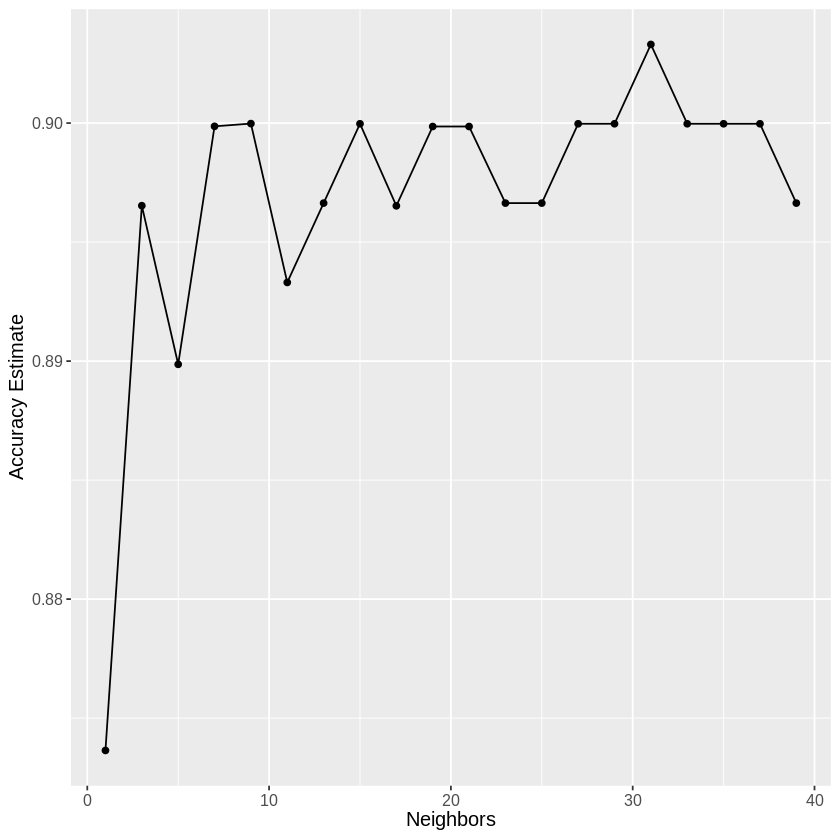

In [10]:
#Since the combination of excess_kurtosis_ip+mean_curve+skewness_ip shows the highest accuracy, so we will set up a model based on these three predictors.

#find the best k 

bestk_recipe<- recipe(Class ~ excess_kurtosis_ip+mean_curve+skewness_ip,data= htru_train)|>
step_upsample(Class, over_ratio = 1, skip=FALSE)|>
step_center(all_predictors())|>
step_scale(all_predictors())|>
prep()
bestk_recipe

temp_recipe<-recipe(Class ~excess_kurtosis_ip+mean_curve+skewness_ip,data= htru_train)|>
step_center(all_predictors())|>
step_scale(all_predictors())

processed<-bake(bestk_recipe,htru_train)
processed

set.seed(23)
processed<- sample_n(processed, size=300, replace = FALSE,prob=NULL)
processed
               
bestk_spec <- nearest_neighbor(weight_func = "rectangular",neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")
k_vals <- tibble(neighbors = seq(from = 1,to= 40, by=2))

bestk_vfold <- vfold_cv(processed, v = 10, strata = Class)
                       
bestk_result <- workflow()|>
add_recipe(temp_recipe)|>
add_model(bestk_spec)|>
tune_grid(resamples = bestk_vfold, grid = k_vals) |>
collect_metrics()
bestk_result

accuracies <- bestk_result |>
  filter(.metric == "accuracy")
accuracies

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))
accuracy_vs_k

In [11]:
#from the graph, we can find that when k=9, we have the higehst accuracy.
final_spec <- nearest_neighbor(weight_func="rectangular", neighbors = 32)|>
set_engine("kknn")|>
set_mode("classification")

final_recipe <- temp_recipe

final_fit <- workflow()|>
add_recipe(final_recipe)|>
add_model(final_spec)|>
fit(data = processed)

htru_preidiction<- predict(final_fit, htru_test)|>
bind_cols(htru_test)

check <- htru_preidiction|>
filter(.pred_class == 0)
check

htru_prediction_accuracy<-  htru_preidiction|>
  metrics(truth = Class, estimate = .pred_class) |>
  filter(.metric == "accuracy")
htru_prediction_accuracy

.pred_class,mean_ip,deviation_ip,excess_kurtosis_ip,skewness_ip,mean_curve,deviation_curve,excess_kurtosis_curve,skewness_curve,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.09329609
